In [1]:
import numpy as np
import pandas as pd
from scipy.stats import laplace
import scipy.stats
import psycopg2
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
param_dic = {
    "host"      : "localhost",
    "database"  : "bachelorBesoeg2014",
    "user"      : "postgres",
    "password"  : "password",
    "port"      : "5432"
}

def execQuery(params_dic,query):
    try:
        connection = psycopg2.connect(**params_dic)
        cursor = connection.cursor()
        cursor.execute(query)
        record = cursor.fetchall()
        return record
    except (Exception, psycopg2.Error) as error :
        connection = False
        print ("Error while connecting to PostgreSQL", error)
    finally:
        if(connection):
            cursor.close()
            connection.close()
            print("Executed query and closed connection.")
#"""select count(*) as number_of_dates, count(DISTINCT  count_) as distinct_count from _775147;"""
query = """select time_ from _775147;"""
result = execQuery(param_dic, query)
dates = [(date[0]) for date in result]

Executed query and closed connection.


In [3]:
query = """select count_ from _775147;"""
result = execQuery(param_dic, query)
"""
print(result)
print(type(result))
print(type(result[0]))
print((str(result[0][0])))
"""
counts = [(count[0]) for count in result]

Executed query and closed connection.


In [28]:
class bad_con_obs:
    
    def __init__(self, T, epsilon, dates, counts):
        
        self.T = int(2**np.ceil(np.log2(T)))
        self.epsilon = epsilon
        self.zeta = (np.log2(T))/epsilon
        self.dates = dates
        self.n_layers = int(np.log2(self.T))
        values = np.arange(0,len(dates))
        zip_iterator = zip(dates, values)
        self.idx_dict =  dict(zip_iterator)
        
        self.real_counts = counts
        
        self.noise_counts = self.__process(self.real_counts)
        
        
    
    def __process(self, dates):
        noise_counts = np.zeros(len(dates))
        
        for idx, date_count in enumerate(counts):
            laplace_sum = np.sum(laplace(scale=self.zeta).rvs(int(np.ceil(np.log2(1794)))))
            noise_counts[idx] = date_count + laplace_sum + noise_counts[idx-1]
            
        return noise_counts
    
    def answer(self, dates):
        
        if len(dates) < 2:
            date_obj_0 = datetime.strptime(dates[0],'%Y-%m-%d').date()
            #print(date_obj_0)
            #print(type(date_obj_0))
            idx = self.idx_dict[date_obj_0]
            #Index is not 0
            if idx:
                return self.noise_counts[idx] - self.noise_counts[idx-1]            
            else:
                return self.noise_counts[idx]
        else:
            """
            print(self.noise_counts[0:4])
            print(self.noise_counts[self.idx_dict[dates[0]]])
            print(self.noise_counts[self.idx_dict[dates[1]]] )
            print(f'date_obj_0 idx = {self.idx_dict[date_obj_0]}')
            print(f'date_obj_1 idx = {self.idx_dict[date_obj_1]}')
            print(f'noise_counts[{self.idx_dict[date_obj_0]}] = {self.noise_counts[self.idx_dict[date_obj_0]]}')
            print(f'noise_counts[{self.idx_dict[date_obj_1]}] = {self.noise_counts[self.idx_dict[date_obj_1]]}')
            """
            date_obj_0 = datetime.strptime(dates[0],'%Y-%m-%d').date()
            date_obj_1 = datetime.strptime(dates[1],'%Y-%m-%d').date()
            
            idx_0 = self.idx_dict[date_obj_0]
            idx_1 = self.idx_dict[date_obj_1]
            
            #idx_0 is not 0
            if idx_0:
                return self.noise_counts[idx_1] - self.noise_counts[idx_0-1]            
            else:
                return self.noise_counts[idx_1]
        
    def real_answer(self, dates):
        if len(dates) < 2:
            date_obj_0 = datetime.strptime(dates[0],'%Y-%m-%d').date()
            return self.real_counts[self.idx_dict[date_obj_0]]
        else:
            date_obj_0 = datetime.strptime(dates[0],'%Y-%m-%d').date()
            date_obj_1 = datetime.strptime(dates[1],'%Y-%m-%d').date()
            sum_ = np.sum(self.real_counts[self.idx_dict[date_obj_0]: self.idx_dict[date_obj_1]+1])  
            return sum_

In [5]:
T = len(dates)
epsilon = 0.7
c_o = bad_con_obs(T, epsilon, dates, counts)
print(c_o.answer(('2014-01-02','2014-01-05')))
print(c_o.real_answer(('2014-01-02','2014-01-05')))

print(c_o.answer(('2014-01-20',)))
print(c_o.real_answer(('2014-01-20',)))

329.4402947301019
488
233.60784121747474
315


In [6]:
for i in np.arange(50,10000,50):
    print(i)
    print(np.mean(laplace(scale=(np.log2(1000))/epsilon).rvs(i)))

50
1.499632161825972
100
-1.7277725081900388
150
-2.0657710418954407
200
-3.470711485494701
250
-1.0826253124415093
300
-2.750530803028766
350
1.91226239229575
400
0.9221068692621671
450
0.9681276871854907
500
1.0978837566142003
550
-0.21901264498781697
600
-0.6603637947889611
650
-1.0930851724929382
700
0.09217909659593906
750
0.09360993896563521
800
1.7527480589883622
850
-1.6312705163617933
900
-0.6845586304189433
950
0.7028832970590442
1000
-0.28083484427386496
1050
-0.22711457534384807
1100
-0.40008323264417583
1150
0.692525420601049
1200
-0.7822344194847985
1250
0.4654335633137283
1300
0.1289712886248685
1350
0.5599364039363284
1400
0.14521704561808751
1450
-0.09603059359433035
1500
1.0404880529775173
1550
-0.5984126754377013
1600
-0.49591003365574077
1650
-0.23178638417767072
1700
-0.7163488498577426
1750
0.572415682453775
1800
0.3473272288645225
1850
0.48082575191860355
1900
0.25842161837511735
1950
0.013598020717878136
2000
-0.5561110969683121
2050
0.7325829001592074
2100
-0.0

In [7]:
print( laplace(scale=(np.log2(T))/epsilon).rvs(1))

[-3.56433868]


In [8]:
start_date = datetime.strptime('2014-01-02','%Y-%m-%d').date()
n_dates = 1000
result = pd.date_range(start = start_date, periods = n_dates).to_pydatetime().tolist()

In [9]:
dates = [(date.date()) for date in result]

In [10]:
counts = np.zeros(n_dates)
counts[500] = 1

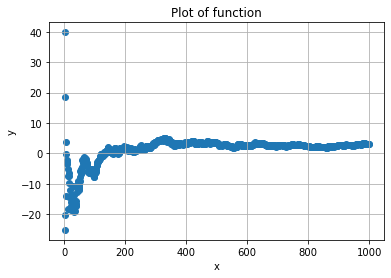

In [29]:
T = len(dates)
epsilon = 0.7
c_o = bad_con_obs(T, epsilon, dates, counts)
ys = []
for i in range(1,n_dates):
    #print(c_o.answer((str(start_date),str(dates[i]))))
    ys.append((c_o.answer((str(start_date),str(dates[i]))))/i )
xs = np.arange(1,n_dates)

fig = plt.figure(1)
p3 = plt.scatter(xs, ys)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of function')
plt.grid(True)
plt.show()